In [9]:
# imports
from copy import deepcopy
import numpy as np

from sklearn.utils import shuffle

from evaluation import alpha_variance, mean_accuracy
from network import line_network, synthetic_graph
from optimization import average_FW, local_FW, neighbor_FW, centralized_FW
from utils import load_wine_dataset, generate_models, generate_samples

## setting problem


In [28]:
NB_ITER = 1000
N = 100
D = 10
random_state = 20160922
V, theta_true, cluster_indexes = generate_models(nb_clust=1, nodes_per_clust=N, random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_samples(V, theta_true, D, random_state=random_state)

# set graph
nodes = synthetic_graph(X, Y, X_test, Y_test, V, theta_true)

# set callbacks for optimization analysis
callbacks = {
    'mean-accuracy': [mean_accuracy, []]
}

# set methods to compare
methods = {
    "centralized": centralized_FW, 
    "local": local_FW,
    "average": average_FW,
    "neighbor": neighbor_FW
}

## run methods

In [29]:
results = {}
for k, m in methods.items():

    nodes_copy = deepcopy(nodes)
    results[k] = m(nodes_copy, N, NB_ITER, callbacks=callbacks)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

### Compare average accuracies 
two iterative FW algorithms. At each iteration
1. local indipendent optimization (**local**)
2. local optimization + average alpha between neighbors (**global**)
3. centralized optimization of global classifier (**centralized**)
4. local optimization + search space update with neighbor's classifiers (**neighbor**)

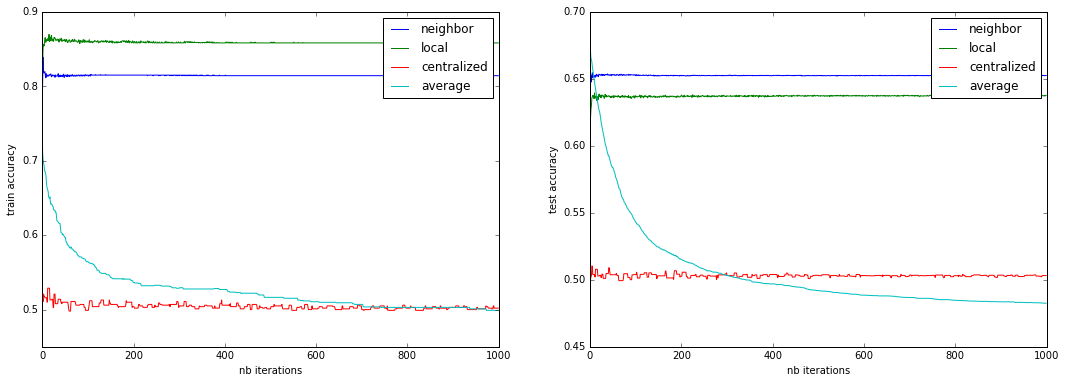

In [31]:
plt.figure(1, figsize=(18, 6))

plt.subplot(121)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in r_list], label='{}'.format(k))
plt.legend()

plt.subplot(122)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in r_list], label='{}'.format(k))

plt.legend()

- Local policies overfit
- at first iteration, averaging alphas between neighbors improves test accuracy
- keeping on averaging degrades train-test accuracies, converging to centralized results